In [47]:
import os
from crnn import CRNN
import torch
import torch.nn.functional as F
import torchvision
import dataset
from torch.autograd import Variable
import utils
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
nh = 100
alphabet = '0123456789'
nclass = len(alphabet) + 1
nc = 1
mynet = CRNN(32, nc, nclass, nh)

In [49]:
converter = utils.strLabelConverter(alphabet)

In [50]:
mynet.load_state_dict(torch.load('/home/sherlock/Documents/express_recognition/data/model_save/telephone/newbaseline.pth'))
mynet = mynet.cuda()
mynet = mynet.eval()

In [51]:
root = '/home/sherlock/Documents/express_recognition/data/validation/'
img_root = root + 'telephone_data_2'
txt_root = root + 'telephone_label_validation_2.txt'

In [52]:
dset = dataset.Dataset(img_root=img_root, txt_root=txt_root)

In [53]:
print('All Valid Image number is {}'.format(len(dset)))

All Valid Image number is 285


In [ ]:
def get_acc():
    transformer = dataset.resizeNormalize((256, 32))
    num_correct = 0
    for i, img_path in enumerate(dset.image):
        image = Image.open(img_path).convert('L')
        image = transformer(image).cuda()
        image = image.view(1, *image.size())
        image = Variable(image)

        preds = mynet(image) # sequence_length x batch_size x n_classes
        _, preds = preds.max(2) # sequence_length x batch_size x 1
        preds = preds.view(-1) # sequence_length x 1
        preds_size = torch.IntTensor([preds.size(0)])
        raw_pred = converter.decode(preds.data, preds_size, raw=True)
        sim_pred = converter.decode(preds.data, preds_size, raw=False)
        if sim_pred == dset.label[i]:
            num_correct += 1
        else:
            pic = Image.open(img_path)
            plt.imshow(pic)
            plt.show()
            print(img_path.split('/')[-1])
            print('{} => {}'.format(raw_pred, sim_pred))
    print('total number is: {}'.format(num_correct))
    print('total accuracy: {:.6f}'.format(num_correct/len(dset)))

In [54]:
def decode(x):
    i = 0
    text = ''
    while i < len(x)-1:
        temp = x.cpu().data[i]
        if temp == 0:
            i += 1
        else:
            text += str(temp-1)
            if temp == x.cpu().data[i+1]:
                i += 2
            else:
                i += 1
    if i == len(x)-1:
        if x.cpu().data[i] != 0:
            text += str(x.cpu().data[i]-1)
    return text

In [60]:
def get_acc_new():
    transformer = dataset.resizeNormalize((256, 32))
    num_correct = 0
    new_correct = 0
    for j, img_path in enumerate(dset.image):
        image = Image.open(img_path).convert('L')
        image = transformer(image).cuda()
        image = image.view(1, *image.size())
        image = Variable(image)

        preds = mynet(image) # sequence_length x batch_size x n_classes
        _, preds = preds.max(2) # sequence_length x batch_size x 1
        preds = preds.view(-1) # sequence_length x 1
        preds_size = torch.IntTensor([preds.size(0)])
        raw_pred = converter.decode(preds.data, preds_size, raw=True)
        sim_pred = converter.decode(preds.data, preds_size, raw=False)
        my_pred = decode(preds)
        if sim_pred == dset.label[j]:
            num_correct += 1
        else:
            print('old error')
            pic = Image.open(img_path)
            plt.imshow(pic)
            plt.show()
            print('{} => {}'.format(raw_pred, sim_pred))
        if my_pred == dset.label[j]:
            new_correct += 1
        else:
            print('new error')
            pic = Image.open(img_path)
            plt.imshow(pic)
            plt.show()
            print('{} => {}'.format(raw_pred, my_pred))
        print('*'*10)
    print('old total number is: {}'.format(num_correct))
    print('new total number is: {}'.format(new_correct))
    print('old total accuracy: {:.6f}'.format(num_correct/len(dset)))
    print('new total accuracy: {:.6f}'.format(new_correct/len(dset)))

old error


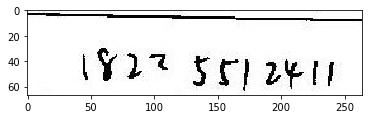

11-----8-22-----5-551122-411-1-- => 1825512411
new error


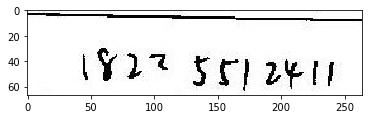

11-----8-22-----5-551122-411-1-- => 1825512411
**********
old error


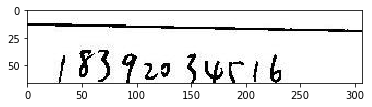

11--88-3-9922-33-44-51-66------- => 1839234516
new error


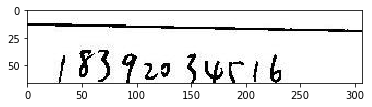

11--88-3-9922-33-44-51-66------- => 1839234516
**********
**********
old error


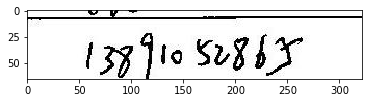

11-----3-8-9100-5--8866-5------- => 1389105865
new error


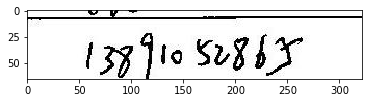

11-----3-8-9100-5--8866-5------- => 1389105865
**********
**********
**********
**********
**********
old error


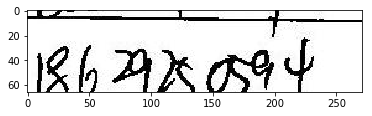

1188-6--2--9---550-55-9--44----- => 1862950594
new error


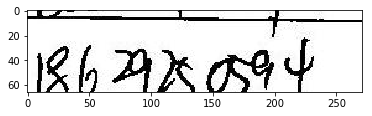

1188-6--2--9---550-55-9--44----- => 1862950594
**********
**********
**********
old error


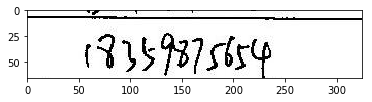

11-----8-335993-75--5-4--------- => 1835937554
new error


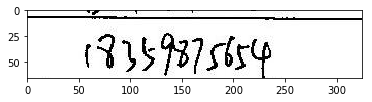

11-----8-335993-75--5-4--------- => 1835937554
**********
old error


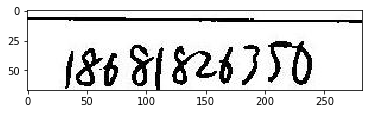

11---8-66-811-8-2266-7-5-701---- => 1868182675701
new error


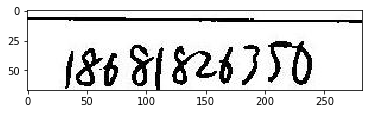

11---8-66-811-8-2266-7-5-701---- => 1868182675701
**********
**********
**********
**********
**********
**********
old error


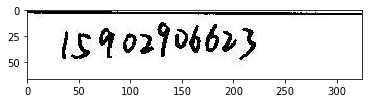

11--55-9-0229900662233---------- => 1590290623
new error


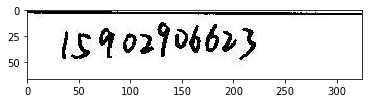

11--55-9-0229900662233---------- => 1590290623
**********
old error


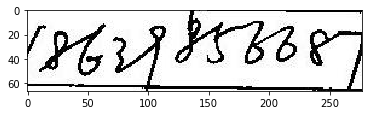

1-88-66-32-99--8--5--6--8--8--77 => 186329856887
new error


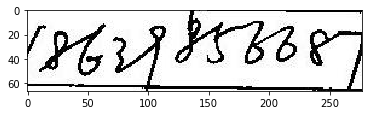

1-88-66-32-99--8--5--6--8--8--77 => 186329856887
**********
new error


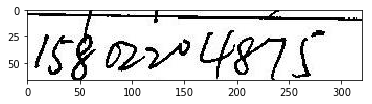

115--8-0-2-22-0044-888-77-5----- => 158022048875
**********
old error


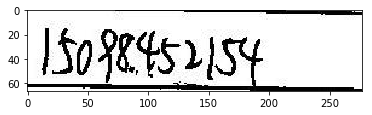

11-5-099---4-5-2-155-4---------- => 1509452154
new error


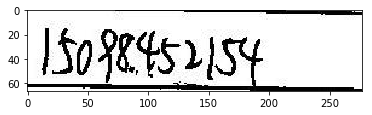

11-5-099---4-5-2-155-4---------- => 1509452154
**********
**********
old error


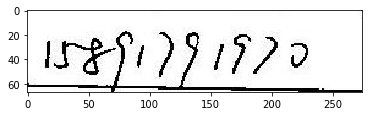

11-55-8-991177-9-11-9--2-00----- => 15891791920
new error


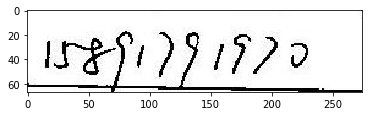

11-55-8-991177-9-11-9--2-00----- => 15891791920
**********
old error


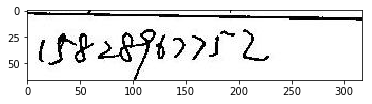

115588-2-899922-2-5--2---------- => 1582892252
new error


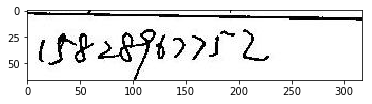

115588-2-899922-2-5--2---------- => 15828992252
**********
**********
**********
**********
**********
**********
**********
old error


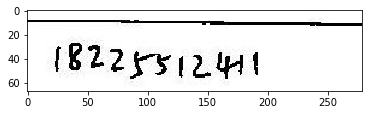

11-88-2-2-55551-2-44111--------- => 182251241
**********
**********
**********
old error


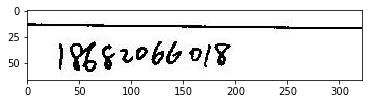

11--8868-20066-0018------------- => 1868206018
new error


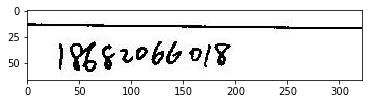

11--8868-20066-0018------------- => 1868206018
**********
old error


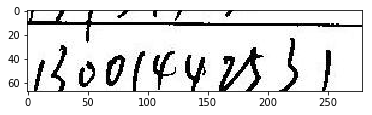

1133-0--011-44-44-32-55--3111--- => 130014432531
new error


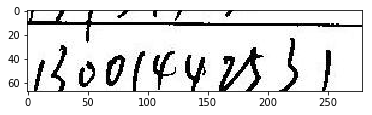

1133-0--011-44-44-32-55--3111--- => 1300144325311
**********
new error


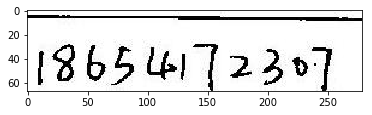

11-8--6--5-44411-7--2--3-00-7--- => 186544172307
**********
**********
**********
**********
old error


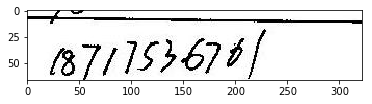

11-88771-775-3-66778811--------- => 18717536781
new error


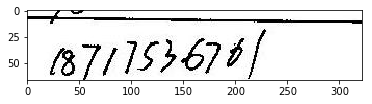

11-88771-775-3-66778811--------- => 18717536781
**********
**********
**********
**********
**********
**********
old error


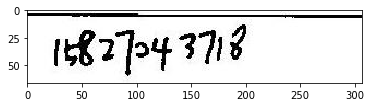

11-5-8-2-72-44-3-7188----------- => 15827243718
new error


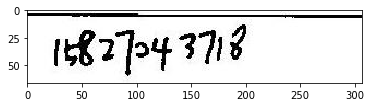

11-5-8-2-72-44-3-7188----------- => 15827243718
**********
old error


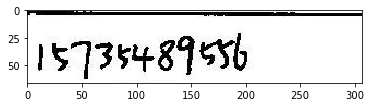

11557733-5448-99-55-66---------- => 1573548956
new error


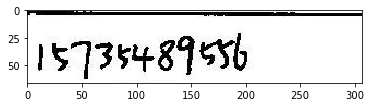

11557733-5448-99-55-66---------- => 1573548956
**********
old error


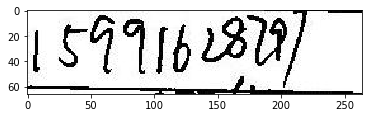

1--55-99-99-1-6622-8877991------ => 15991628791
new error


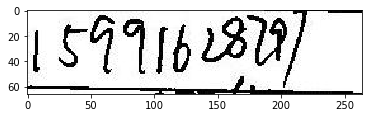

1--55-99-99-1-6622-8877991------ => 15991628791
**********
**********
**********
old error


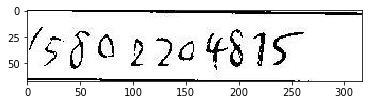

1-5-0--0--2-22-0-4-8877-5------- => 15002204875
new error


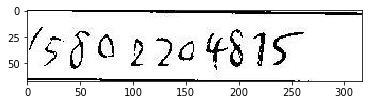

1-5-0--0--2-22-0-4-8877-5------- => 15002204875
**********
new error


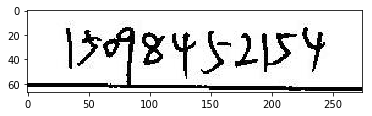

-111-5-009-88-44-55-2-155--4---- => 115098452154
**********
old error


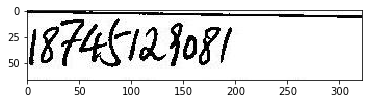

1887744-511--9908811------------ => 1874519081
new error


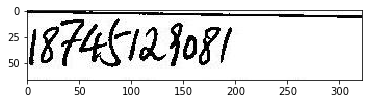

1887744-511--9908811------------ => 1874519081
**********
old error


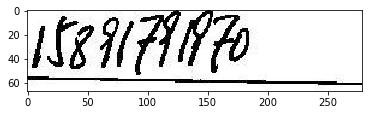

1-5-88-9111799-9-99-1----------- => 1589179991
new error


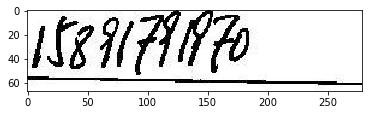

1-5-88-9111799-9-99-1----------- => 15891179991
**********
old error


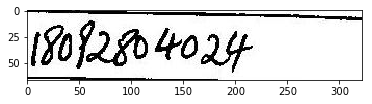

188-992-8-00-4-0-2-44----------- => 1892804024
new error


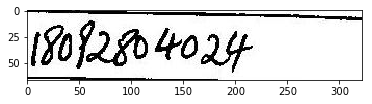

188-992-8-00-4-0-2-44----------- => 1892804024
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
old error


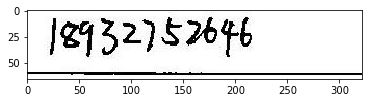

11-889-3--277552254-66---------- => 18932752546
new error


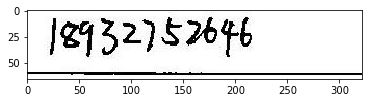

11-889-3--277552254-66---------- => 18932752546
**********
old error


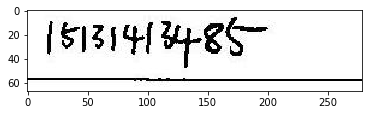

11-5113-14111444-8-55----------- => 1513141485
new error


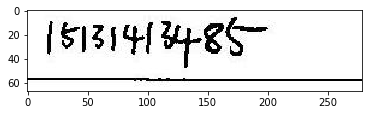

11-5113-14111444-8-55----------- => 151314114485
**********
old error


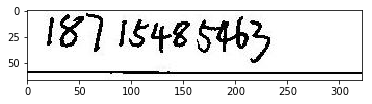

11-88-7-1-5-4-8-55-66-3--------- => 1871548563
new error


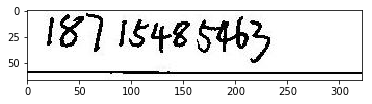

11-88-7-1-5-4-8-55-66-3--------- => 1871548563
**********
old error


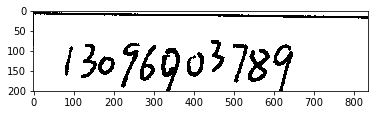

11--3300996-90-0-3-7-8-99------- => 130969003789
new error


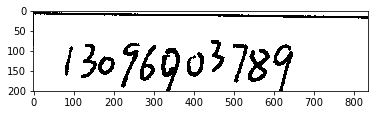

11--3300996-90-0-3-7-8-99------- => 130969003789
**********
old error


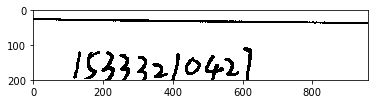

11---53333-2210044227----------- => 153210427
new error


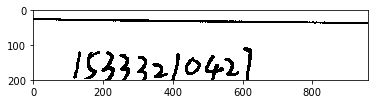

11---53333-2210044227----------- => 1533210427
**********
**********
**********
**********
**********
**********
**********
**********
old error


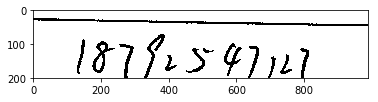

11----8-77-9---55-4-7711-77----- => 187954717
new error


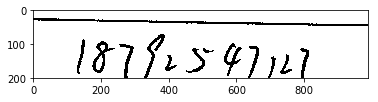

11----8-77-9---55-4-7711-77----- => 187954717
**********
old error


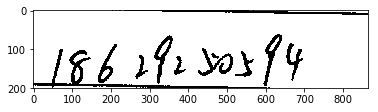

11-88-66-229922-200-5-9-44------ => 18629220594
new error


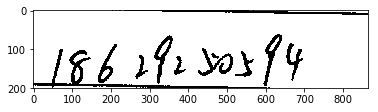

11-88-66-229922-200-5-9-44------ => 18629220594
**********
**********
**********
**********
**********
**********
old error


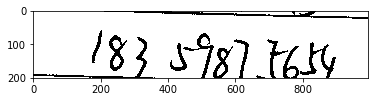

11-----88-3--55998877-3-66-54--- => 18359873654
new error


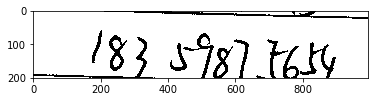

11-----88-3--55998877-3-66-54--- => 18359873654
**********
**********
old error


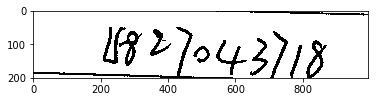

11------88-227700-44-3-71188---- => 1827043718
new error


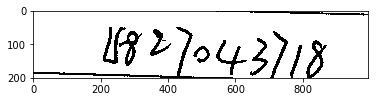

11------88-227700-44-3-71188---- => 1827043718
**********
old error


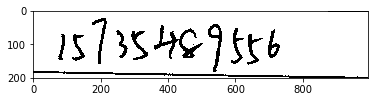

11-557733-5-4-88-9-55-66-------- => 1573548956
new error


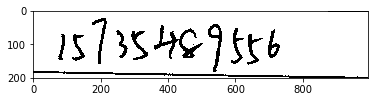

11-557733-5-4-88-9-55-66-------- => 1573548956
**********
**********
**********
**********
old error


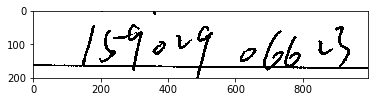

11----55-9-0--599---0-6-66-2-3-- => 15905906623
new error


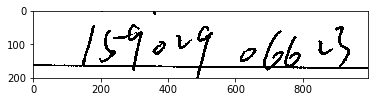

11----55-9-0--599---0-6-66-2-3-- => 15905906623
**********
**********
**********
old error


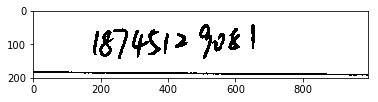

11----8-74-5122-9--811---------- => 1874512981
new error


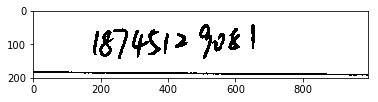

11----8-74-5122-9--811---------- => 1874512981
**********
**********
**********
**********
**********
**********
old error


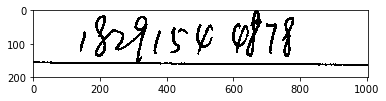

11---88-299115--4---8-798------- => 18291548798
new error


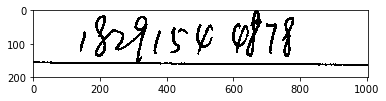

11---88-299115--4---8-798------- => 18291548798
**********
new error


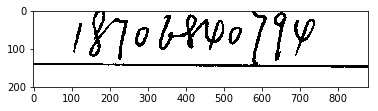

11---887700-6-8-44-077-9444----- => 187068407944
**********
old error


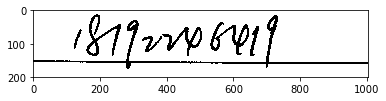

11---887992-224--6-41-99-------- => 18792246419
new error


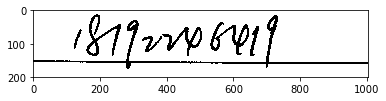

11---887992-224--6-41-99-------- => 18792246419
**********
old error


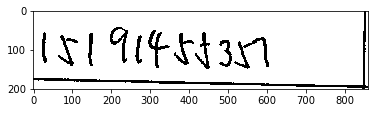

11-511-991-4--5-8-35577--------- => 15191458357
new error


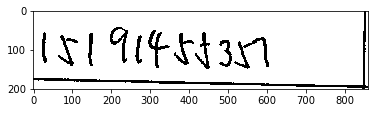

11-511-991-4--5-8-35577--------- => 15191458357
**********
old error


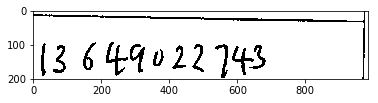

1-3-66-4-990022--774433--------- => 1364902743
new error


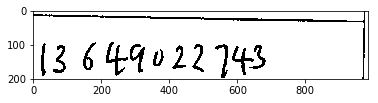

1-3-66-4-990022--774433--------- => 1364902743
**********
**********
**********
old error


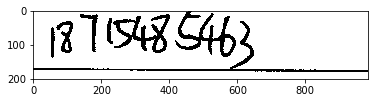

118877-554-88-54466-3----------- => 1875485463
new error


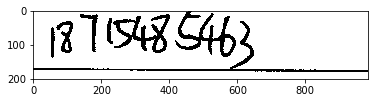

118877-554-88-54466-3----------- => 1875485463
**********
**********
**********
**********
**********
**********
**********
**********
**********
old error


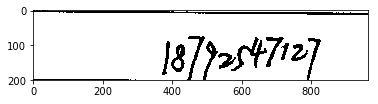

-1-----------8-77-204477-277---- => 187204727
new error


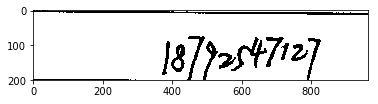

-1-----------8-77-204477-277---- => 187204727
**********
**********
old error


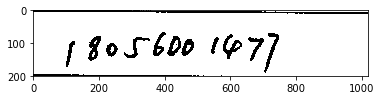

11---8-005566-001-447--7-------- => 1805601477
new error


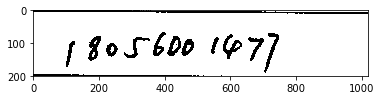

11---8-005566-001-447--7-------- => 1805601477
**********
old error


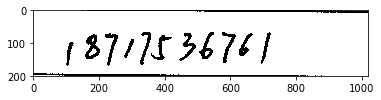

11---877--755-3-6776611--------- => 1877536761
new error


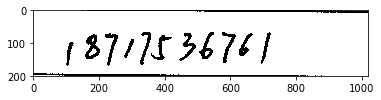

11---877--755-3-6776611--------- => 1877536761
**********
**********
**********
**********
**********
**********
**********
old error


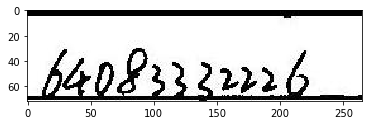

--6-44-0-8833-3-3-2222-2-66----- => 6408333226
**********
**********
**********
**********
**********
old error


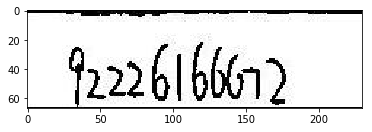

----9-222-2-61166666-11-2------- => 92261612
new error


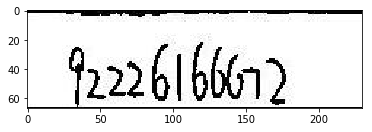

----9-222-2-61166666-11-2------- => 92226166612
**********
old error


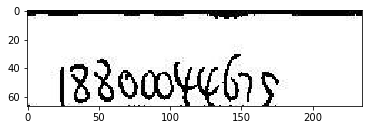

11--88-8-0--0-4-44-66755-------- => 1880044675
new error


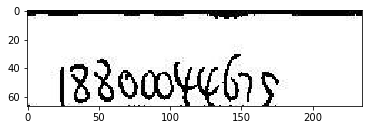

11--88-8-0--0-4-44-66755-------- => 1880044675
**********
**********
**********
**********
old error


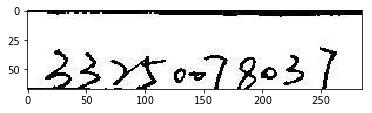

---3-33-2--5--0--77-8-00-3--7--- => 3325078037
new error


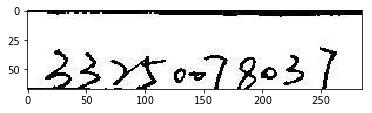

---3-33-2--5--0--77-8-00-3--7--- => 3325078037
**********
**********
**********
**********
old error


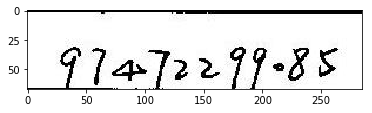

---99-77-4-77-2--2-99992-88-5--- => 9747229285
new error


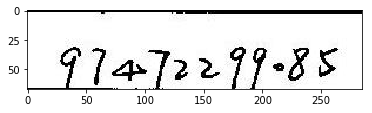

---99-77-4-77-2--2-99992-88-5--- => 97472299285
**********
old error


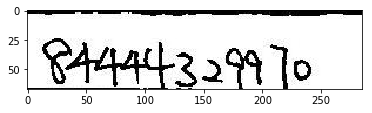

--88-444444-4--3-2-999-7700----- => 84432970
**********
old error


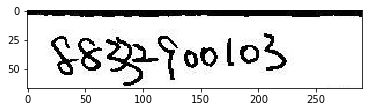

--88-88-3-5-9900-01100-33------- => 8835900103
new error


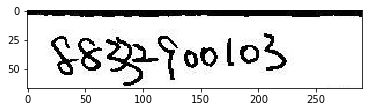

--88-88-3-5-9900-01100-33------- => 8835900103
**********
old error


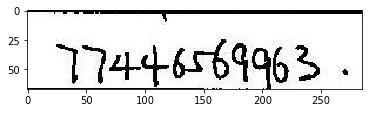

---77-7744-44-65566-9--66-3----- => 7744656963
new error


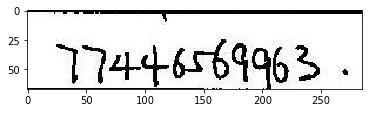

---77-7744-44-65566-9--66-3----- => 7744656963
**********
old error


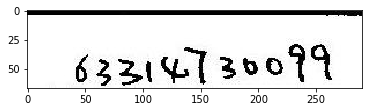

----8--3-311-44-7-33-0-0-9--9--- => 83314730099
new error


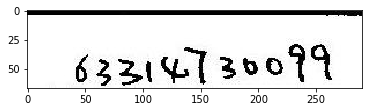

----8--3-311-44-7-33-0-0-9--9--- => 83314730099
**********
old error


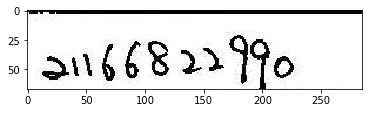

--2--1-6-66-8--2-2-99-9-0------- => 2166822990
new error


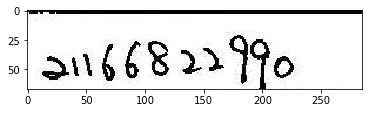

--2--1-6-66-8--2-2-99-9-0------- => 2166822990
**********
new error


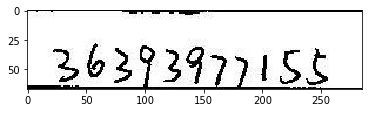

---3--6-33-9-3-99-7-711155-55--- => 363939771155
**********
old error


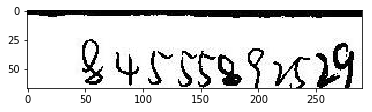

-----88--4--5-555-88-99225522-9- => 8455892529
**********
**********
old error


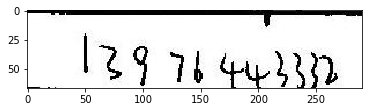

-1-----33-99-77-6-44-4-3333--2-- => 139764432
new error


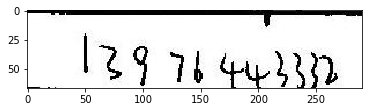

-1-----33-99-77-6-44-4-3333--2-- => 1397644332
**********
**********
old error


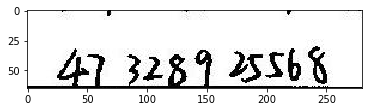

---44-77-3-22-8-99-2255556-88--- => 4732892568
**********
old error


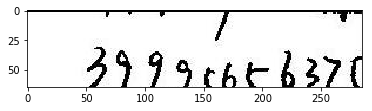

-1----3--9--9-9---66-5--6-33-7-1 => 13999656371
new error


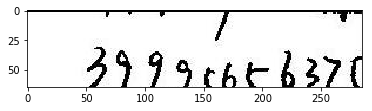

-1----3--9--9-9---66-5--6-33-7-1 => 13999656371
**********
old error


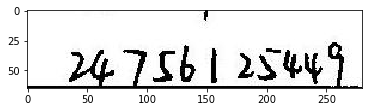

----2-44-77-55-6-1--2-554444-9-- => 2475612549
**********
**********
**********
**********
**********
**********
**********
old error


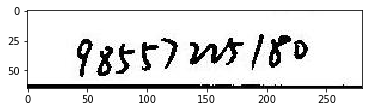

----9988-5-5-7-2222--118-00----- => 985572180
new error


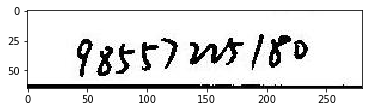

----9988-5-5-7-2222--118-00----- => 9855722180
**********
**********
**********
**********
old error


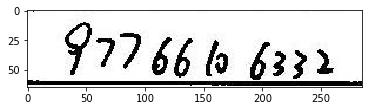

----9--7-77-6-66110--6-333--2--- => 9776610632
**********
**********
**********
old error


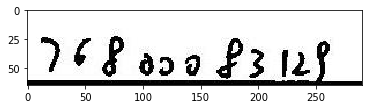

--7-66-88-8--2-00--8-331122-9--- => 76882083129
new error


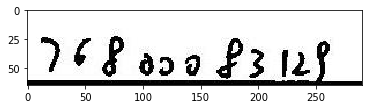

--7-66-88-8--2-00--8-331122-9--- => 76882083129
**********
**********
**********
**********
**********
old error


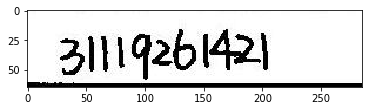

---331--11992266144-2211-------- => 3119261421
new error


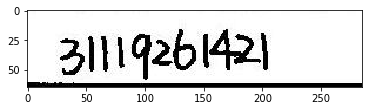

---331--11992266144-2211-------- => 3119261421
**********
old error


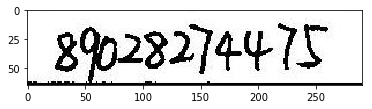

---8-99--2288-227744-44-7755---- => 8928274475
new error


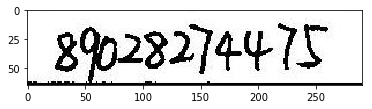

---8-99--2288-227744-44-7755---- => 8928274475
**********
**********
new error


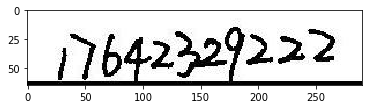

111--7-66-4-2--3-2-99-2--2--2--- => 117642329222
**********
**********
old error


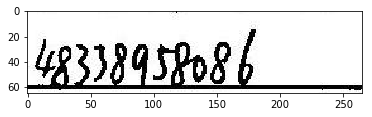

--8833-38-9955800-8-66---------- => 8338958086
new error


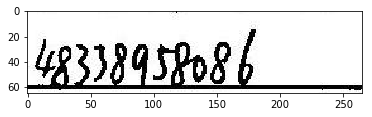

--8833-38-9955800-8-66---------- => 8338958086
**********
**********
old error


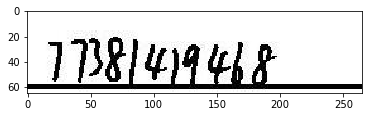

--7-77-881144119-4466-8--------- => 7781419468
new error


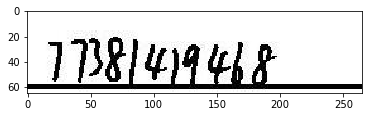

--7-77-881144119-4466-8--------- => 7781419468
**********
**********
old error


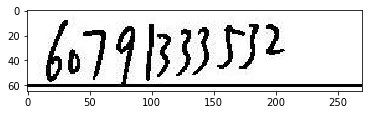

-66-0-77-9113-333--5-3-2-------- => 6079133532
**********
**********
**********
**********
**********
**********
old error


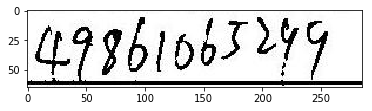

--4-99-88-611-0066-3--2-9--9---- => 49861063299
new error


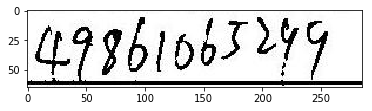

--4-99-88-611-0066-3--2-9--9---- => 49861063299
**********
**********
old error


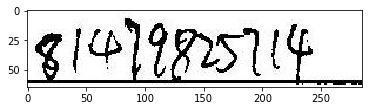

-8811--4-99-9-8-22-5-711-44----- => 81499825714
new error


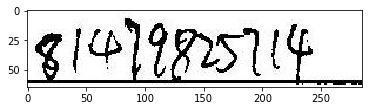

-8811--4-99-9-8-22-5-711-44----- => 81499825714
**********
**********
old error


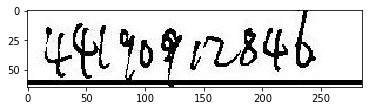

--4------900-9-11-2-88-4--6----- => 490912846
new error


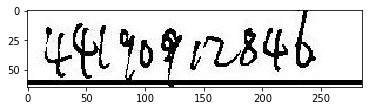

--4------900-9-11-2-88-4--6----- => 490912846
**********
**********
old error


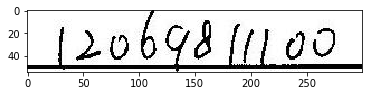

-111-22-00-6-99-8811--11-0-00--- => 1206981100
new error


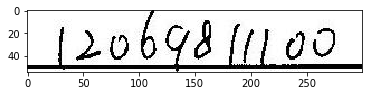

-111-22-00-6-99-8811--11-0-00--- => 11206981100
**********
**********
**********
**********
old error


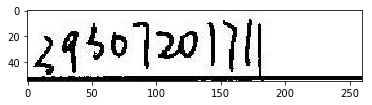

-2-99-3-007722-011771111-------- => 2930720171
new error


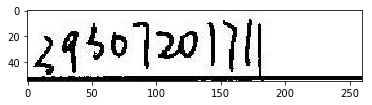

-2-99-3-007722-011771111-------- => 29307201711
**********
old error


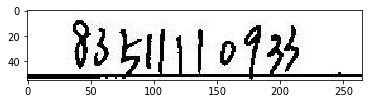

----8-33-511-11-1-00-9-3-3------ => 8351110933
new error


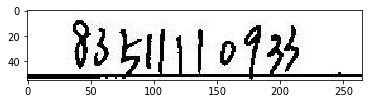

----8-33-511-11-1-00-9-3-3------ => 8351110933
**********
old error


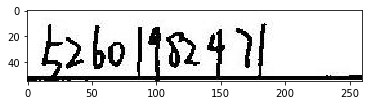

-55-2-6-011-98-22-9-7-11-------- => 52601982971
new error


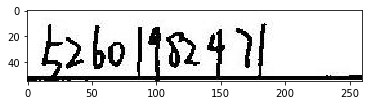

-55-2-6-011-98-22-9-7-11-------- => 52601982971
**********
old error


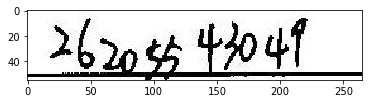

--22-6-2-0055-5-44--00-4-99----- => 2620554049
new error


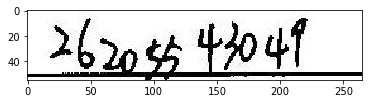

--22-6-2-0055-5-44--00-4-99----- => 2620554049
**********
old error


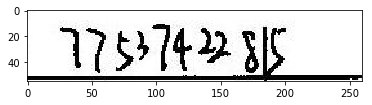

---77-7-55-37744-22-88-5-------- => 775374285
new error


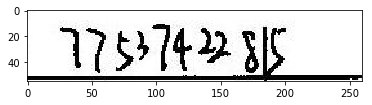

---77-7-55-37744-22-88-5-------- => 775374285
**********
**********
old error


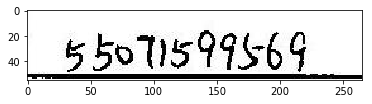

----5-55-0-7115-9999-5-6-99----- => 5507159569
**********
**********
**********
**********
old error


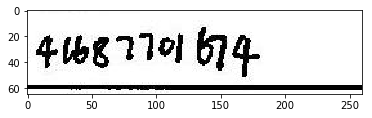

-4--4-88-7-7-01-8-7-4----------- => 4487701874
new error


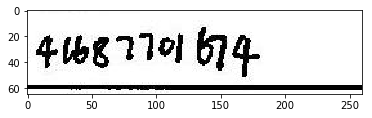

-4--4-88-7-7-01-8-7-4----------- => 4487701874
**********
**********
**********
**********
**********
old error


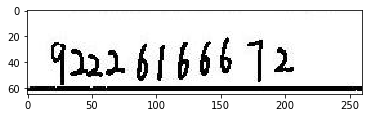

--99-2--2-6-116-66-6-77-2------- => 9226166672
new error


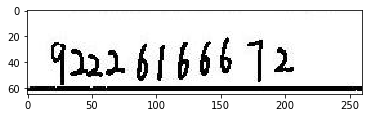

--99-2--2-6-116-66-6-77-2------- => 9226166672
**********
**********
**********
old error


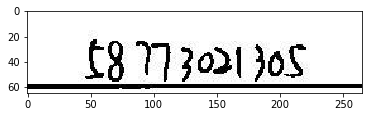

-----55-8-77773300-11330-55----- => 587301305
new error


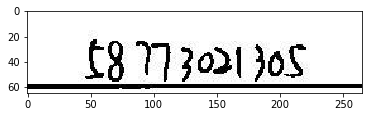

-----55-8-77773300-11330-55----- => 5877301305
**********
**********
**********
**********
**********
old error


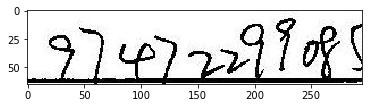

---9--7--448-7--2--2-9--9-0-8--5 => 974872299085
new error


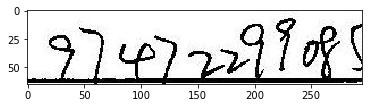

---9--7--448-7--2--2-9--9-0-8--5 => 974872299085
**********
old error


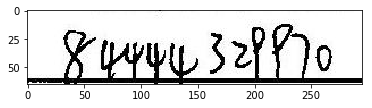

----8--4-44-4-44-3-22999--7-0--- => 8444432970
**********
**********
**********
**********
**********
old error


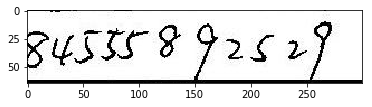

8-44-5----5-88--99-2--5--2-99--- => 8455892529
new error


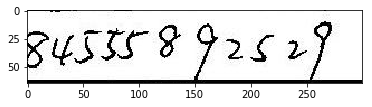

8-44-5----5-88--99-2--5--2-99--- => 8455892529
**********
**********
**********
old error


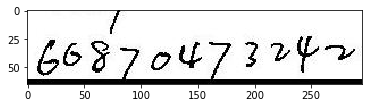

-6--0-88-7--0--4--7--3-22-4--22- => 60870473242
new error


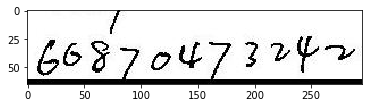

-6--0-88-7--0--4--7--3-22-4--22- => 60870473242
**********
old error


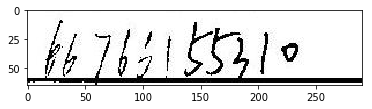

-6--6-7-66-3-1-5--5-3-1100------ => 66763155310
new error


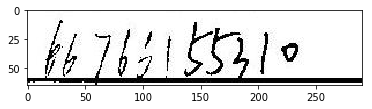

-6--6-7-66-3-1-5--5-3-1100------ => 66763155310
**********
old error


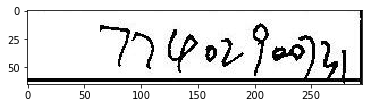

--------77-7--4-00-2-990--9-311- => 7740290931
new error


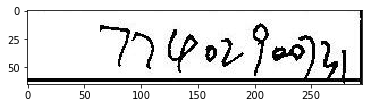

--------77-7--4-00-2-990--9-311- => 7740290931
**********
old error


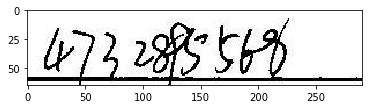

--44-7-33-2-88--5-5-66-8-------- => 473285568
new error


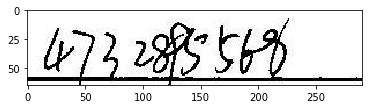

--44-7-33-2-88--5-5-66-8-------- => 473285568
**********
old error


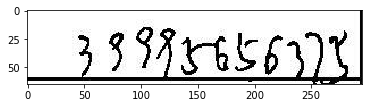

-----3--9-99-9-5--0-55-6---7--3- => 3999505673
new error


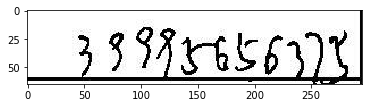

-----3--9-99-9-5--0-55-6---7--3- => 3999505673
**********
**********
**********
old error


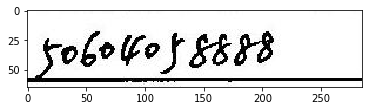

-5-0066044-00-588-888-88-------- => 5060405888
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
old error


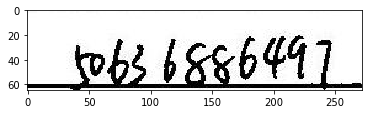

-----0006-3--6-88-8-66-4-99-7--- => 0636886497
new error


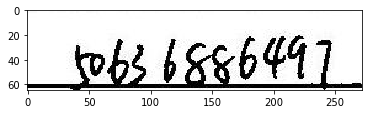

-----0006-3--6-88-8-66-4-99-7--- => 00636886497
**********
old error


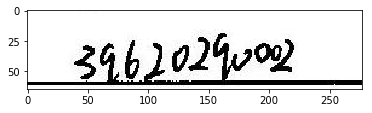

-----3-9-66-2-0-2-900-0-22------ => 3962029002
new error


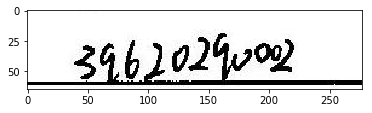

-----3-9-66-2-0-2-900-0-22------ => 3962029002
**********
new error


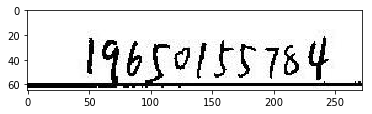

---111-9966-5-001-5-5577-8-44--- => 119650155784
**********
old error


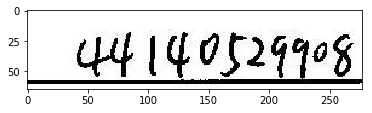

-----44--4-1--4-00-5-2299990088- => 4414052908
**********
**********
old error


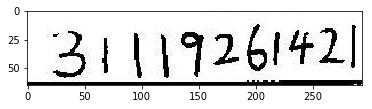

----3311111111-99-22-661144-2211 => 319261421
new error


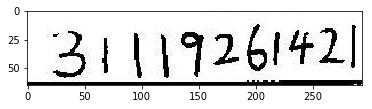

----3311111111-99-22-661144-2211 => 311119261421
**********
**********
**********
**********
**********
**********
**********
old error


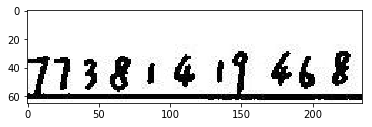

7--7-33-88----44-11-9--44-6--88- => 7738419468
new error


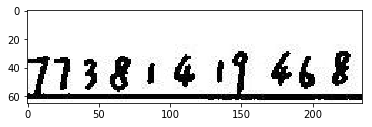

7--7-33-88----44-11-9--44-6--88- => 7738419468
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
**********
new error


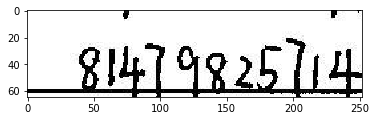

-----881-44-7--9-88-2-55-7-11444 => 814798257144
**********
**********
**********
old error


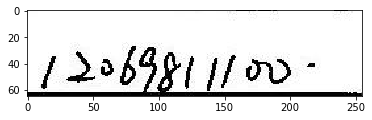

11--22-0-6-988111--110--0--2---- => 12069811002
new error


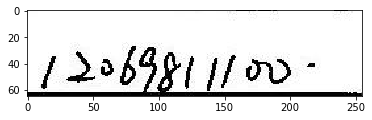

11--22-0-6-988111--110--0--2---- => 120698111002
**********
old error


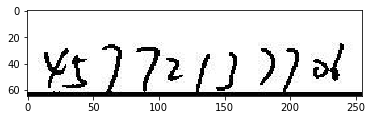

--4-55-77--7-2211--3--2--7-0-1-- => 45772132701
new error


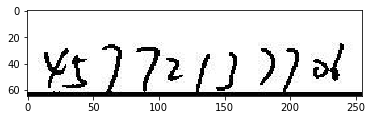

--4-55-77--7-2211--3--2--7-0-1-- => 45772132701
**********
**********
old error


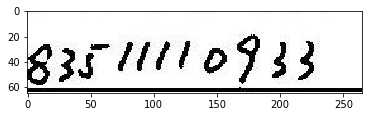

---3--5-1--11--1-00-99-33-3----- => 351110933
new error


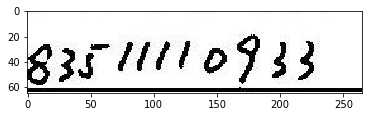

---3--5-1--11--1-00-99-33-3----- => 351110933
**********
**********
new error


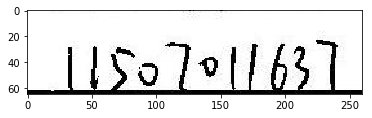

-111--1-55-0--770011-1-66-3-77-- => 111507011637
**********
**********
old error


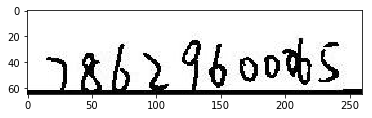

--77-88-66-22--9-66-0-00-66-55-- => 7862960065
new error


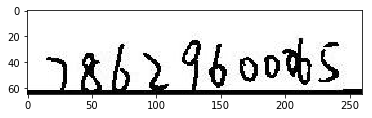

--77-88-66-22--9-66-0-00-66-55-- => 7862960065
**********
old error


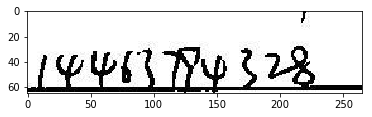

11-44-44-6-3-7---44-33-2-88----- => 1446374328
new error


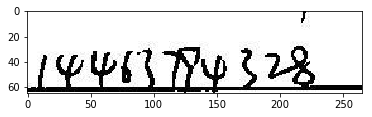

11-44-44-6-3-7---44-33-2-88----- => 1446374328
**********
**********
old total number is: 188
new total number is: 191
old total accuracy: 0.659649
new total accuracy: 0.670175


In [61]:
get_acc_new()

In [ ]:
def show_result(img_name):
    root = '/home/sherlock/Documents/express_recognition/data/validation/telephone_data'
    img_path = os.path.join(root, img_name)
    transformer = dataset.resizeNormalize((256, 32))
    image = Image.open(img_path).convert('L')
    image = transformer(image).cuda()
    image = image.view(1, *image.size())
    image = Variable(image)
    
    mynet.eval()
    preds = mynet(image) # sequence_length x batch_size x n_classes
    _, preds = preds.max(2) # sequence_length x batch_size x 1
    preds = preds.view(-1) # sequence_length x 1
    preds_size = torch.IntTensor([preds.size(0)])
    raw_pred = converter.decode(preds.data, preds_size, raw=True)
    sim_pred = converter.decode(preds.data, preds_size, raw=False)
    pic = Image.open(img_path)
    plt.imshow(pic)
    plt.show()
    print('{} => {}'.format(raw_pred, sim_pred))

In [ ]:
show_result('1_10_0_0.png')

In [ ]:
root = '/home/sherlock/Documents/express_recognition/data/validation/telephone_data'
img_path = os.path.join(root, '1_10_0_0.png')
transformer = dataset.resizeNormalize((256, 32))
image = Image.open(img_path).convert('L')
image = transformer(image).cuda()
image = image.view(1, *image.size())
image = Variable(image)

mynet.eval()
preds = mynet(image) # preds sequence_length x batch_size x n_classes

In [ ]:
preds = preds.squeeze(1)

In [ ]:
preds = F.softmax(preds)
prob, label = torch.max(preds, 1)

In [ ]:
tele = ''
for i in range(label.size(0)):
    if prob[i].cpu().data[0] > 0.9:
        if label[i].cpu().data[0] == 0:
            tele += '-'
        else:
            tele += str(label[i].cpu().data[0]-1)

In [ ]:
for i in range(preds.size(0)):
    label = preds.cpu().data[i, :]
    label = label.numpy()
    plt.plot(label)
    plt.title('{}'.format(i))
    plt.show()

In [ ]:
all_file_name = os.listdir('/home/sherlock/Documents/express_recognition/data/validation/telephone/')

for img in all_file_name:
    show_result(img)
    print()